In [ ]:
# imports

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


gapminder = pd.read_csv('data/gapminder.csv')
who = pd.read_csv('data/WHO.csv')

Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 15 ("                               'fc4f30', ")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 16 ("                               'e5ae38',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 17 ("                               '6d904f',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 18 ("                               '8b8b8b',")
Missing colon in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 19 ("                               '810f7c'])")
Bad value in file PosixPath('/home/mz/.config/matplotlib/stylelib/scientific.mplstyle'), line 14 ("axes.prop_cycle: cycler(color=['008fd5', "): Key axes.prop_cycle: 'cycler(color=['008fd5',' is not a valid cycler construction: unexpected EOF while parsing (<unknown>, 

# seaborn
- Seaborn is a Python data visualization library based on matplotlib.

# Linechart
- Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
- sns.set_theme() - uses the matplotlib rcParam system and will affect how all matplotlib plots look

In [ ]:
italy = gapminder[gapminder.country=='Italy']

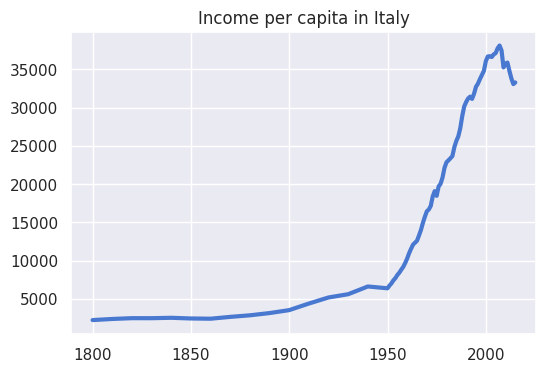

In [68]:
sns.set_theme(style="darkgrid", palette="muted")

# Axes to apply matplot adjustments within the ax
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=100)

sns.lineplot(x=italy.year, y=italy.gdp_per_capita, linewidth=3)
ax.set_title('Income per capita in Italy');
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

# replot
- relations plot can switch betwen kind = 'scatter' and 'line' 
- source/df is given to the function with data=df and than the features can be called by name
- set_theme can change many aspects of the appearance, context, style, etc can be called seperatly
- height and aspect (the ratio of the width to the height) are used to change the figure size

In [77]:
whr=pd.read_csv('data/WHR_2019.csv')
who=pd.read_csv('data/WHO.csv')
who.iat[ 192, 0] = 'United States'  # iat allows to access a single value for a row/column pair

whr_who = whr.merge(who, left_on="Country or region", right_on="Country", how='outer')

emissions = whr_who[['Country', 'Score', 'Total_CO2_emissions', 'GDP per capita', 'Population (in thousands) total', \
                                'Perceptions of corruption', 'Per capita government expenditure on health (PPP int. $)']]\
                    .sort_values('Total_CO2_emissions', ascending=False).dropna(subset='Total_CO2_emissions')

emissions.columns = ['Country', 'happiness_score', 'emissions', 'gdp_pc', 'population', 'percepted_corruption', 'health_expenditure_pc']

emissions.dropna(inplace=True)

emissions['log_gdp_pc'] = np.log(emissions.gdp_pc)
emissions['emissions_pc'] = emissions.emissions/(emissions.population*1000)
emissions.head()

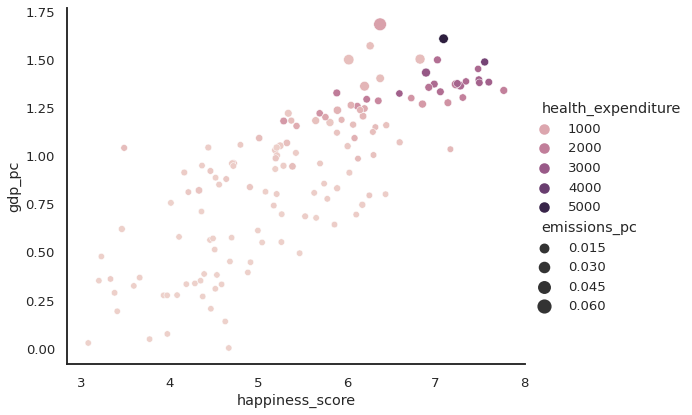

In [165]:
sns.set_theme(context='talk', style='white', palette='pastel', font='sans-serif', font_scale=0.8, color_codes=True, rc=None)
sns.relplot(data=emissions, x="happiness_score", y="gdp_pc", \
    size='emissions_pc', hue='health_expenditure', kind='scatter', height=6, aspect=1.3);

In [151]:
x = gapminder[gapminder.year == 1965]['babies_per_woman']
y = gapminder[gapminder.year == 1965]['age5_surviving']

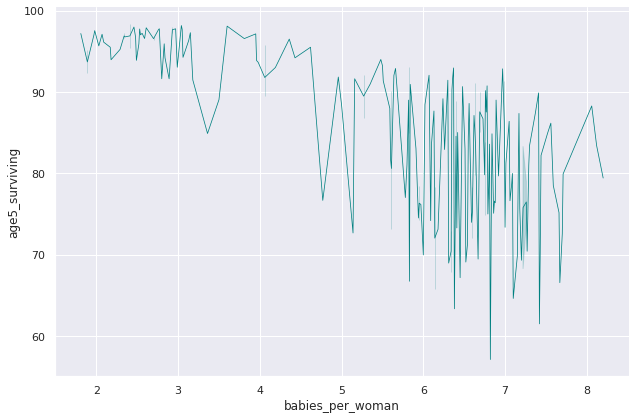

In [163]:
sns.relplot(x=x,
            y=y,
            color='teal',
            size=10,
            legend=False,
            kind='line',
            height=6,
            aspect=1.5)
